In [1]:
pip install transformers

In [2]:
from transformers import ViTForImageClassification, ViTImageProcessor
import torch

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
model.to(device)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (intermed

In [5]:
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


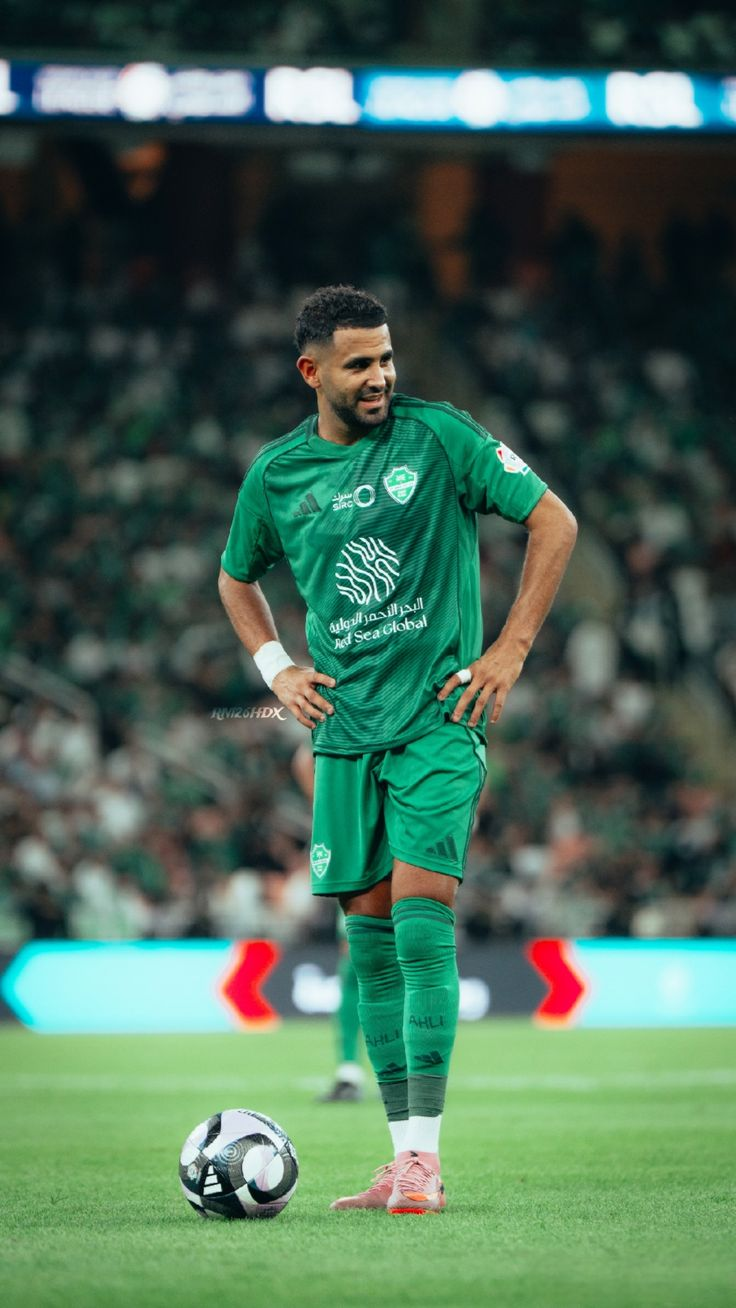

In [7]:
from PIL import Image

image_path = '/content/Mahrez (1).jpeg'
image = Image.open(image_path)
image

In [8]:
inputs = processor(images=image, return_tensors="pt").to(device)
pixel_values = inputs.pixel_values
pixel_values

tensor([[[[-0.9686, -0.9608, -0.9451,  ..., -0.9608, -0.9608, -0.9608],
          [-0.9765, -0.9765, -0.9765,  ..., -0.9608, -0.9686, -0.9686],
          [-0.9686, -0.9765, -0.9843,  ..., -0.9294, -0.9529, -0.9686],
          ...,
          [-0.3176, -0.3176, -0.3176,  ..., -0.3176, -0.3020, -0.3020],
          [-0.3647, -0.3490, -0.3412,  ..., -0.3490, -0.3333, -0.3255],
          [-0.3725, -0.3647, -0.3490,  ..., -0.3804, -0.3725, -0.3647]],

         [[-0.8039, -0.7961, -0.7725,  ..., -0.8902, -0.8902, -0.8902],
          [-0.8275, -0.8275, -0.8118,  ..., -0.8745, -0.8745, -0.8824],
          [-0.8510, -0.8431, -0.8353,  ..., -0.8196, -0.8353, -0.8588],
          ...,
          [ 0.1137,  0.1059,  0.1137,  ...,  0.1137,  0.1294,  0.1294],
          [ 0.0667,  0.0824,  0.0824,  ...,  0.0824,  0.0980,  0.1059],
          [ 0.0588,  0.0667,  0.0824,  ...,  0.0510,  0.0588,  0.0667]],

         [[-0.7961, -0.7882, -0.7647,  ..., -0.8510, -0.8510, -0.8510],
          [-0.8196, -0.8196, -

In [9]:
import torch

with torch.no_grad():
  outputs = model(pixel_values)
  logits = outputs.logits

prediction = logits.argmax(-1)
print("Predicted class:", model.config.id2label[prediction.item()])

Predicted class: soccer ball
